In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
csv_file_path = '../ana_csv/duration_vs_gender-age.csv'

df_duration = pd.read_csv(csv_file_path)

df_duration

,diagnosis,treatment_duration_(weeks),symptom_severity,gender,age_range
0,Bipolar Disorder,16,10,Female,0-18
1,Bipolar Disorder,14,10,Female,19-35
2,Bipolar Disorder,16,10,Female,19-35
3,Bipolar Disorder,11,10,Female,36-50
4,Bipolar Disorder,8,10,Female,51-65
...,...,...,...,...,...
410,Panic Disorder,11,5,Male,51-65
411,Panic Disorder,12,5,Male,19-35
412,Panic Disorder,10,5,Male,19-35
413,Panic Disorder,13,5,Male,51-65


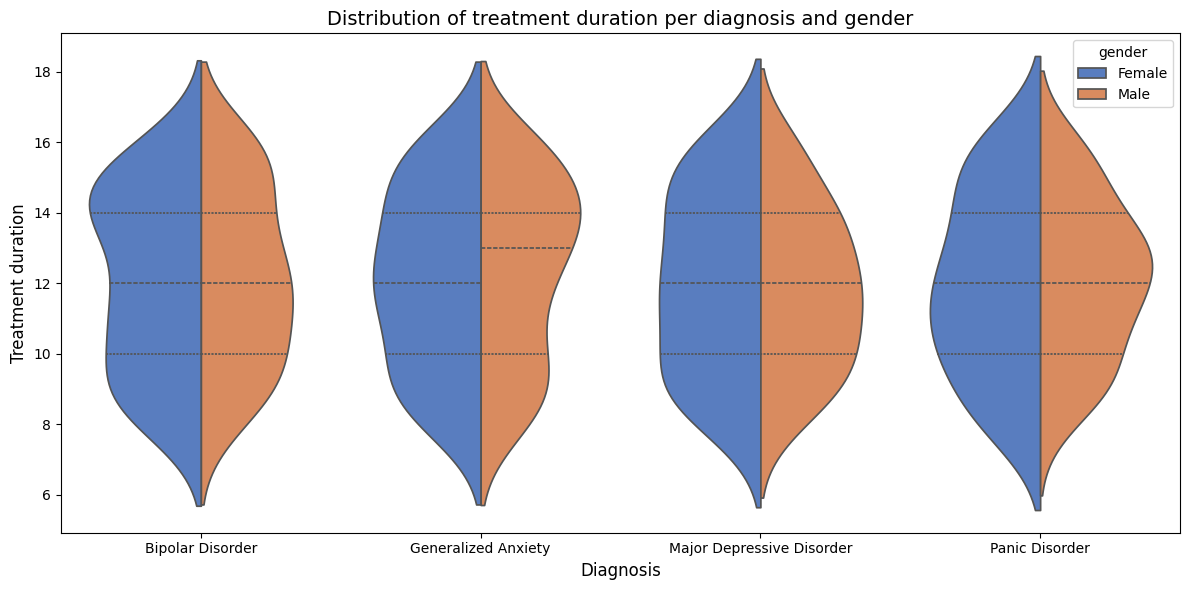

In [ ]:
# Gráfico de violín para 'treatment_duration_(weeks)'

plt.figure(figsize=(12, 6))
sns.violinplot(x='diagnosis', y='treatment_duration_(weeks)', hue='gender', data=df_duration, split=True, inner="quart", palette="muted")
plt.title('Distribution of treatment duration per diagnosis and gender', fontsize=14)
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Treatment duration', fontsize=12)
plt.legend(title='gender')
plt.tight_layout()
plt.show()


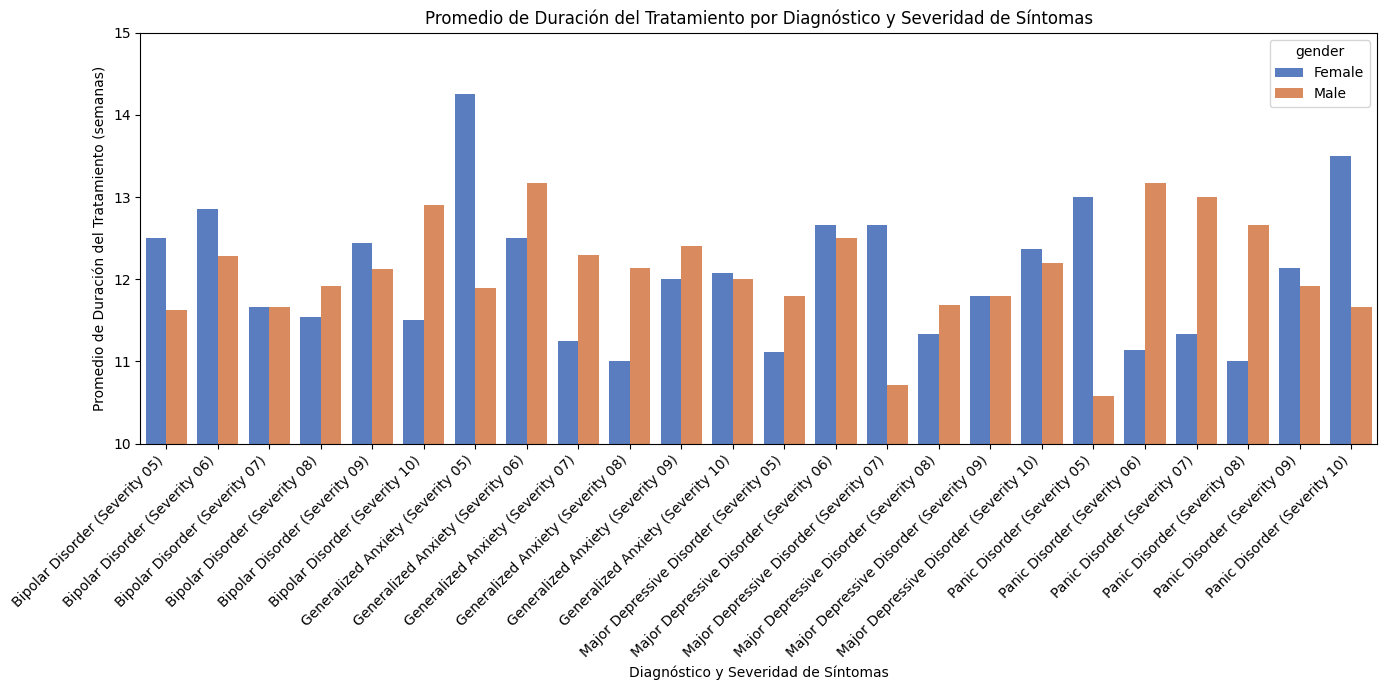

In [ ]:
df_duration['diagnosis_severity'] = df_duration['diagnosis'] + ' (Severity ' + df_duration['symptom_severity'].astype(str).str.zfill(2) + ')'

# Calculamos el promedio de treatment_duration por diagnosis_severity y gender
grouped_df = df_duration.groupby(['diagnosis_severity', 'gender'])['treatment_duration_(weeks)'].mean().reset_index()

# Creamos el gráfico de barras
plt.figure(figsize=(14, 7))
sns.barplot(x='diagnosis_severity', 
            y='treatment_duration_(weeks)', 
            hue='gender', 
            data=grouped_df,
            errorbar=None,
            palette='muted')

# Configurar leyendas y etiquetas
plt.title('Promedio de Duración del Tratamiento por Diagnóstico y Severidad de Síntomas')
plt.xlabel('Diagnóstico y Severidad de Síntomas')
plt.ylabel('Promedio de Duración del Tratamiento (semanas)')
plt.xticks(rotation=45, ha='right')

# Ajustar los límites del eje Y
plt.ylim(10, 15)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

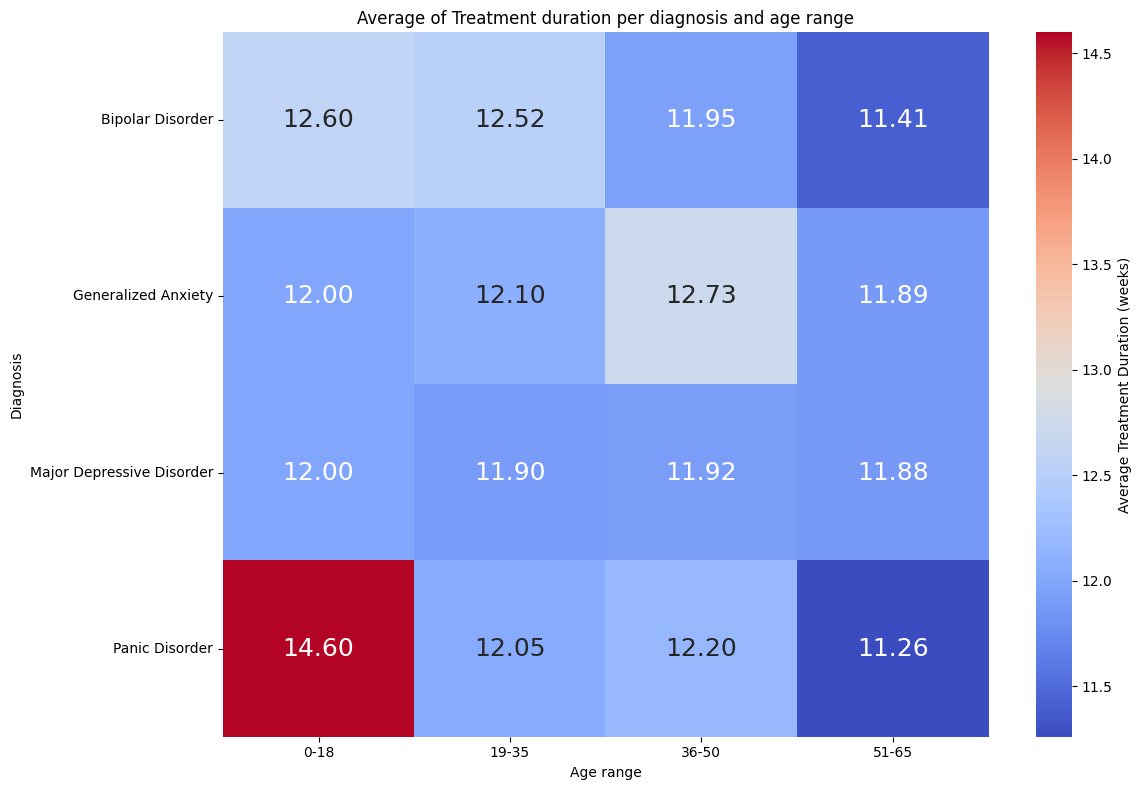

In [29]:
# Mapa de calor con la duración según diagnóstico y edad

pivot_table = df_duration.pivot_table(
    values='treatment_duration_(weeks)', 
    index='diagnosis', 
    columns='age_range', 
    aggfunc='mean'
)

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear el mapa de calor
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Average Treatment Duration (weeks)'}, annot_kws={"size": 18})

# Añadir etiquetas y títulos
plt.title('Average of Treatment duration per diagnosis and age range')
plt.xlabel('Age range')
plt.ylabel('Diagnosis')
# Cambiar paleta de colores
sns.color_palette("coolwarm", len(pivot_table.columns))

# Mostrar el gráfico
plt.tight_layout()
plt.show()